In [79]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import cm
sns.set()


# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_drug_df=pd.read_csv(mouse_drug_data_to_load)
no_of_mouse=mouse_drug_df["Mouse ID"].count()
print(no_of_mouse)
display(mouse_drug_df.head())
#display(mouse_drug_df.dtypes)
clinical_trial_df=pd.read_csv(clinical_trial_data_to_load)
# Read the Mouse and Drug Data and the Clinical Trial Data
display(clinical_trial_df.head())
#display(clinical_trial_df.dtypes)

# Combine the data into a single dataset
merged_data_df=pd.merge(mouse_drug_df, clinical_trial_df, how='left',on=('Mouse ID','Mouse ID'))

# Display the data table for preview
#display(merged_data_df.dtypes)
group_df=merged_data_df.set_index('Mouse ID').groupby(['Drug', 'Timepoint'])
#['Tumor Volume (mm3)'].mean()
# Group the dataframe by regiment, and for each regiment,

std_df=merged_data_df.set_index('Mouse ID').groupby(['Drug', 'Timepoint'])
#['Tumor Volume (mm3)'].std()
#display(std_df.head())


250


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [80]:

#
#ninth_math = merged_data_df[merged_data_df['Drug'] == 'Capomulin'].groupby(['Drug'])['Tumor Volume (mm3)']
#display(ninth_math.head())

group_df_mean = group_df['Tumor Volume (mm3)'].mean().unstack().T
display(group_df_mean.head())

#list(group_df_mean.head())
group_df_std = group_df['Tumor Volume (mm3)'].std().unstack().T
display(group_df_mean.dtypes)
group_df_mean = group_df['Tumor Volume (mm3)'].mean().unstack().T
display(group_df_mean.head())

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug
Capomulin    float64
Ceftamin     float64
Infubinol    float64
Ketapril     float64
Naftisol     float64
Placebo      float64
Propriva     float64
Ramicane     float64
Stelasyn     float64
Zoniferol    float64
dtype: object

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


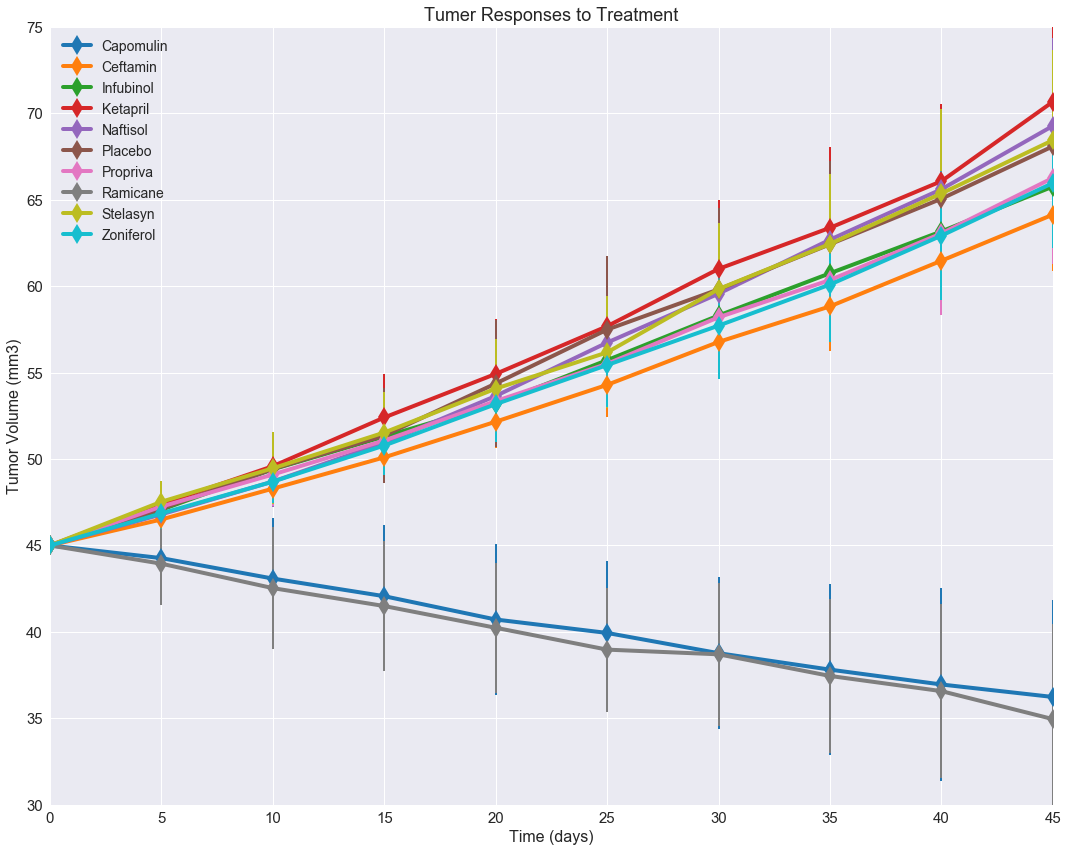

In [138]:
i=0
color=iter(cm.tab10(np.linspace(0,1,10)))

fig, ax = plt.subplots(figsize=(15, 12))

for column in group_df_mean:
     x=group_df_mean.index
     y=group_df_mean[column]
     e=group_df_std[column]
  
     c=next(color)
     
     plt.errorbar(x,y,yerr=e, c=c , ecolor =c, elinewidth = 2,capsize = 5,linewidth=4,marker='d',markersize=14) 
     i +=1
     
     ax.set_ylabel('Tumor Volume (mm3)', fontsize = 16)
     ax.set_xlabel('Time (days)', fontsize = 16)
     ax.axis([0, 45, 30, 75])
     ax.set_title("Tumor Responses to Treatment",fontsize=18)
     ax.tick_params(axis='x', labelsize=15)
     ax.tick_params(axis='y', labelsize=15)
     ax.legend(fontsize =14)
     fig.tight_layout()  

plt.show()

In [139]:
#to choose only four columns
#use
group_df_mean_4=group_df_mean[['Capomulin','Infubinol','Ketapril','Placebo']]
group_df_std_4=group_df_std[['Capomulin','Infubinol','Ketapril','Placebo']]

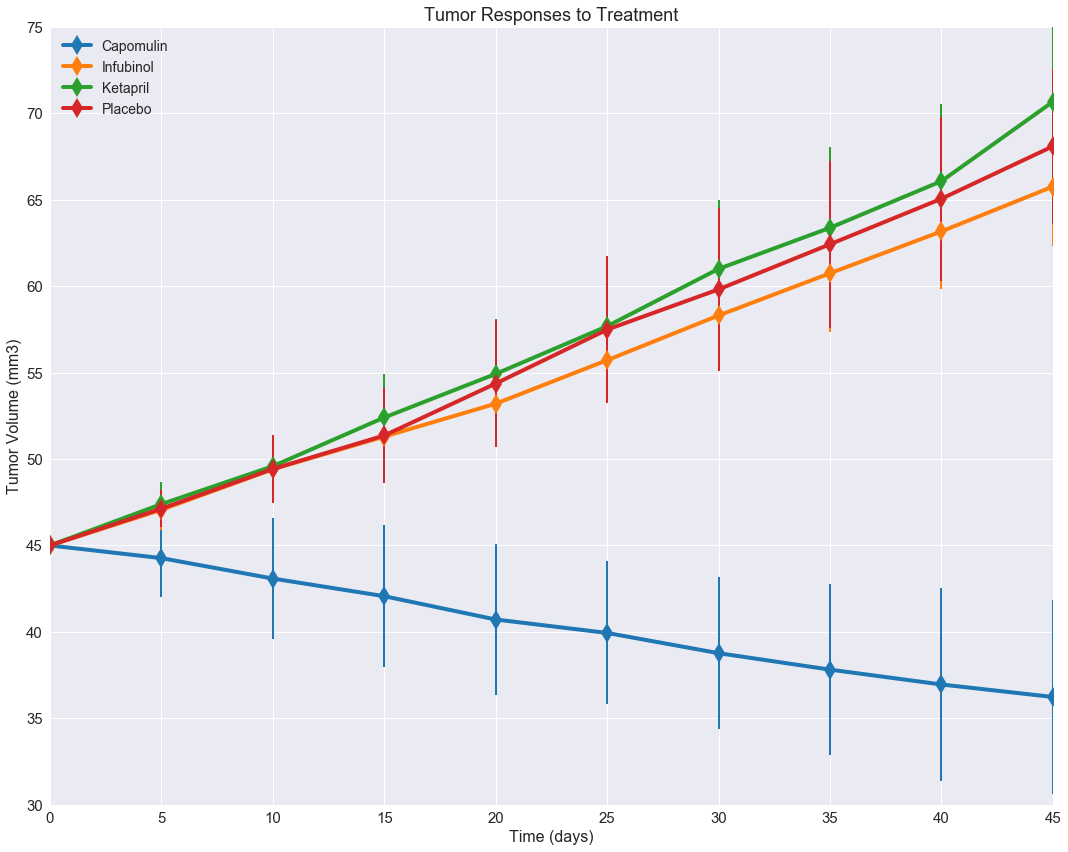

In [141]:
i=0
color=iter(cm.tab10(np.linspace(0,1,10)))

fig, ax = plt.subplots(figsize=(15, 12))

for column in group_df_mean_4:
     x=group_df_mean_4.index
     y=group_df_mean_4[column]
     e=group_df_std_4[column]
  
     c=next(color)
     
     plt.errorbar(x,y,yerr=e, c=c , ecolor =c, elinewidth = 2,capsize = 5,linewidth=4,marker='d',markersize=14) 
     i +=1
     
     ax.set_ylabel('Tumor Volume (mm3)', fontsize = 16)
     ax.set_xlabel('Time (days)', fontsize = 16)
     ax.axis([0, 45, 30, 75])
     ax.set_title("Tumor Responses to Treatment",fontsize=18)
     ax.tick_params(axis='x', labelsize=15)
     ax.tick_params(axis='y', labelsize=15)
     ax.legend(fontsize =14)
     fig.tight_layout()  

plt.show()

In [142]:
fig.savefig('tvm_4.png', dpi=fig.dpi)

## Metastatic Response to Treatment

In [143]:
group_df_mat=merged_data_df.set_index('Mouse ID').groupby(['Drug', 'Timepoint'])
group_df_mean_mat = group_df_mat['Metastatic Sites'].mean()
group_df_mean_mat = group_df_mat['Metastatic Sites'].mean().unstack().T

In [144]:
std_df=merged_data_df.set_index('Mouse ID').groupby(['Drug', 'Timepoint'])
group_df_std_mat = std_df['Metastatic Sites'].std()
#display(group_df_std_mat.head())
group_df_std_mat = std_df['Metastatic Sites'].std().unstack().T
display(group_df_std_mat.head())

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.374166,0.497613,0.458258,0.470472,0.448978,0.494535,0.476095,0.331662,0.435890,0.380693
10,0.627163,0.680557,0.730297,0.666125,0.749603,0.564660,0.506870,0.442326,0.593109,0.511766
15,0.646899,0.787327,0.889087,0.834210,0.727029,0.850696,0.562296,0.564660,0.735868,0.511766
20,0.775107,1.022620,1.050063,1.031662,0.812728,1.020263,0.707107,0.572768,0.920662,0.685994


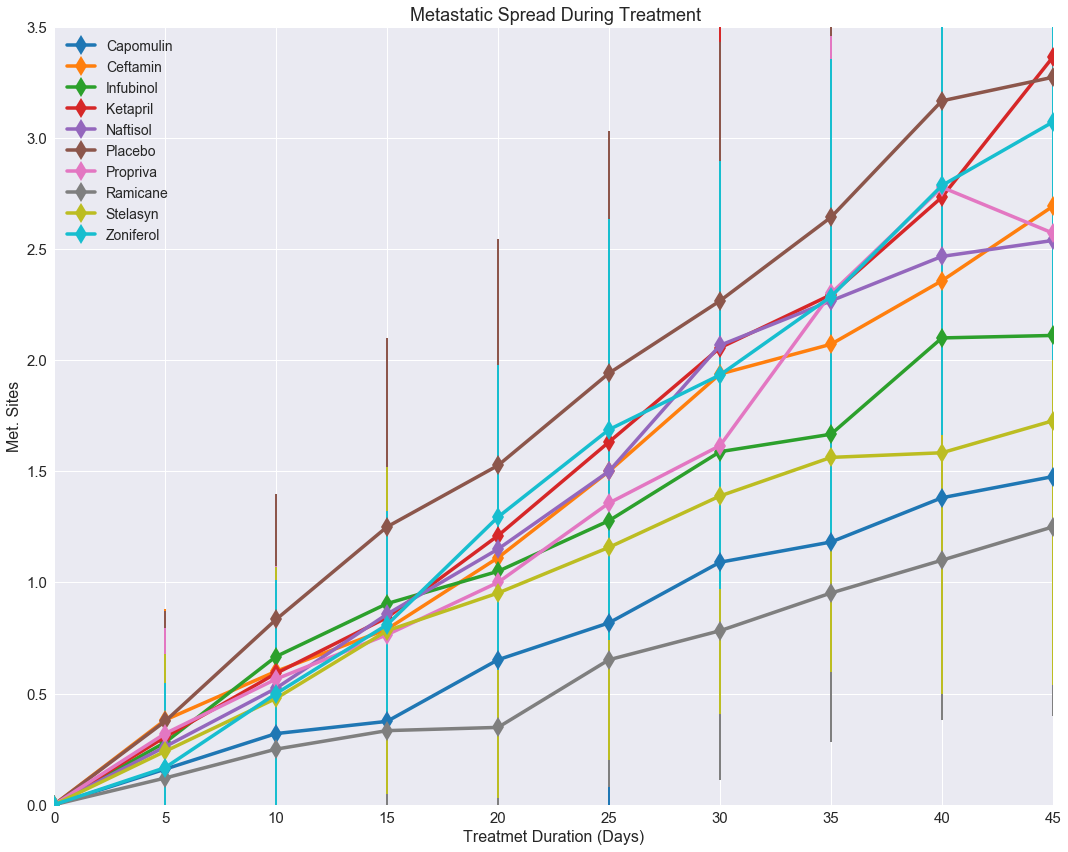

In [145]:
from matplotlib.pyplot import cm
color=iter(cm.tab10(np.linspace(0,1,10)))

fig, ax = plt.subplots(figsize=(15, 12))

for column in group_df_mean_mat:
     x=group_df_mean_mat.index
     y=group_df_mean_mat[column]
     e=group_df_std_mat[column]
  
     c=next(color)
     
     plt.errorbar(x,y,yerr=e, c=c , ecolor =c, elinewidth = 2,capsize = 5, linewidth=3.5,marker='d',markersize=14) 
     i +=1
     
     ax.set_ylabel('Met. Sites', fontsize = 16)
     ax.set_xlabel('Treatmet Duration (Days)', fontsize = 16)
     ax.axis([0, 45, 0, 3.5])
     ax.set_title(" Metastatic Spread During Treatment",fontsize=18)
     ax.tick_params(axis='x', labelsize=15)
     ax.tick_params(axis='y', labelsize=15)
     ax.legend(fontsize =14)
     fig.tight_layout()  
plt.show()
fig.savefig('msdt.png', dpi=fig.dpi)

## Survival Rates

In [146]:
count_df=merged_data_df.set_index('Mouse ID').groupby(['Drug', 'Timepoint'])
group_df_count = count_df['Metastatic Sites'].count()/25*100
#display(group_df_count)
group_df_count_final= group_df_count.unstack().T
#display(group_df_count_final)
group_df_count_final_per=group_df_count_final.pct_change()
#display(group_df_count_final_per)

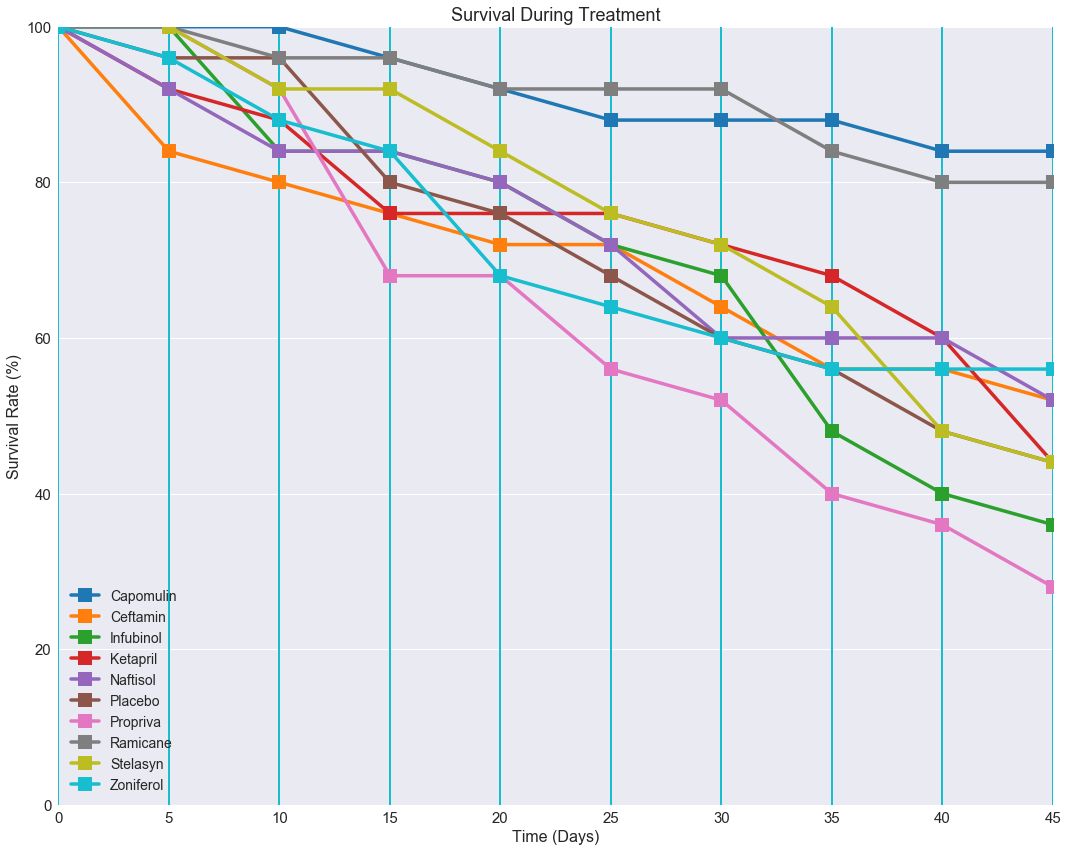

In [70]:
i=0
color=iter(cm.tab10(np.linspace(0,1,10)))

fig, ax = plt.subplots(figsize=(15, 12))

for column in group_df_mean_mat:
     x=group_df_count_final.index
     y=group_df_count_final[column]
     e=group_df_count_final[column]
  
     c=next(color)
     
     plt.errorbar(x,y,yerr=e, c=c , ecolor =c, elinewidth = 2,capsize = 5, linewidth=3.5, marker='s',markersize=14) 
     i +=1
     
     ax.set_ylabel('Survival Rate (%)', fontsize = 16)
     ax.set_xlabel('Time (Days)', fontsize = 16)
     ax.axis([0, 45, 0, 100])
     ax.set_title("Survival During Treatment",fontsize=18)
     ax.tick_params(axis='x', labelsize=15)
     ax.tick_params(axis='y', labelsize=15)
     ax.legend(fontsize =14)
     fig.tight_layout()  
plt.show()
fig.savefig('sdt.png', dpi=fig.dpi)

## Summary Bar Graph

In [127]:
mm3=(group_df_mean.pct_change() * 1000)
print(mm3)
mm4=mm3[9:]
print(mm4)
r9=(mm3.iloc[-1,:] < 0)
print(r9)

less_than_45=merged_data_df[merged_data_df['Tumor Volume (mm3)'] > 45].groupby('Drug')['Drug']
#print(less_than_45.unique())


Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0                NaN        NaN        NaN        NaN        NaN        NaN   
5         -16.309191  33.401132  45.822245  53.092767  39.913291  47.235315   
10        -26.697545  38.321663  49.762175  46.278385  40.561320  48.757805   
15        -23.673901  37.463498  38.306443  56.828879  45.976897  39.180125   
20        -32.045974  41.182404  37.064872  48.109967  53.228127  58.502540   
25        -19.078281  40.850194  47.324637  50.218500  57.562357  57.356574   
30        -29.299008  45.716513  46.381282  57.482386  49.840347  40.472952   
35        -24.568394  36.252389  41.905476  38.973655  52.478243  43.664818   
40        -22.710467  44.882843  39.846314  42.556771  46.512926  42.166517   
45        -19.532632  43.348253  41.048479  69.539518  55.864487  46.599271   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

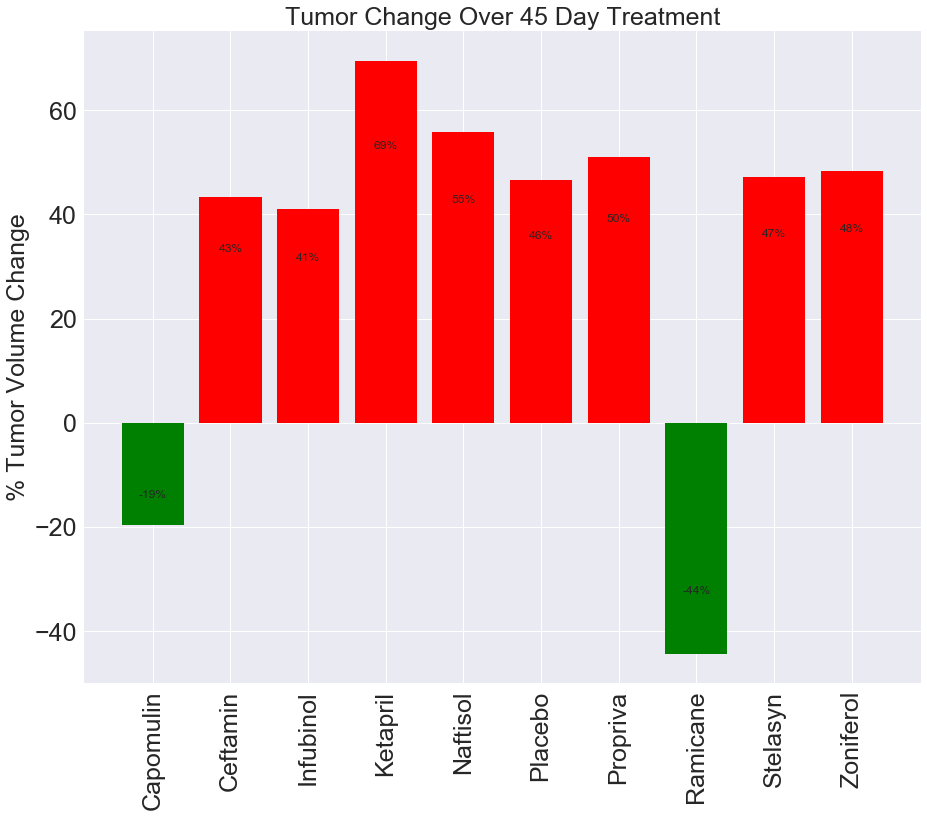

In [131]:
import numpy as np
import matplotlib.pyplot as plt
data = [(-19.532632,'Capomulin'),
(43.348253,'Ceftamin'),
(41.048479,'Infubinol'),
(69.539518,'Ketapril'),
(55.864487,'Naftisol'),
(46.599271,'Placebo'),
(50.963036,'Propriva'),
(-44.252264,'Ramicane'),
(47.155674,'Stelasyn'),
(48.384553,'Zoniferol')]
x,y=zip(*data)
width = 1.3
x_labels=['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
y_pos = np.arange(len(x))
#plt.bar(y ,x, bar_width, color='b',align='center')
#plt.bar(x_labels, x, color=['green', 'r', 'r','r', 'r', 'r','r', 'g', 'r', 'r'])
#plt.xticks(['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])
#ax.xticks( rotation=90)
#plt.tick_params(labelsize = 15)
#plt.xticks(['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])
fig, ax = plt.subplots(figsize=(15, 12))
plt.xticks( rotation=90)
plt.tick_params(labelsize = 25)
ax.set_ylabel('% Tumor Volume Change', fontsize = 25)
ax.set_title('Tumor Change Over 45 Day Treatment', fontsize = 25)
rects1 = ax.bar(x_labels, x, color=['green', 'r', 'r','r', 'r', 'r','r', 'g', 'r', 'r'])
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.75*height,
                '{percent:.0%}'.format(percent=int(height)*0.01),
                ha='center', va='bottom')
autolabel(rects1)
                #'%d'+'%' % int(height),

plt.show()
